In [3]:
%pylab osx

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
col = pd.read_csv('/Users/cpd/Desktop/donuts.csv')
print(col.columns)

Index([u'expid', u'date', u'dateid', u'day', u'month', u'year', u'nightseconds', u'time_recorded', u'filter', u'ifilter', u'exptime', u'ra', u'dec', u'telra', u'teldec', u'propid', u'flavor', u'object', u'program', u'utc_beg', u'hexdx', u'hexdy', u'hexdz', u'hextx', u'hexty', u'ra_offset', u'dec_offset', u'slewangl', u'qc_fwhm', u'qc_sky', u'qc_cloud', u'qc_teff', u'dodx', u'dody', u'dodz', u'doxt', u'doyt', u'dodxerr', u'dodyerr', u'dodzerr', u'doxterr', u'doyterr', u'zdelta', u'zthetax', u'zthetay', u'zdeltaerr', u'zthetaxerr', u'zthetayerr', u'zmeandeltabefore', u'zrmsdeltabefore', u'zmeandeltaafter', u'zrmsdeltaafter', u'z5delta', u'z5thetax', u'z5thetay', u'z5deltaerr', u'z5thetaxerr', u'z5thetayerr', u'z5meandeltabefore', u'z5rmsdeltabefore', u'z5meandeltaafter', u'z5rmsdeltaafter', u'z6delta', u'z6thetax', u'z6thetay', u'z6deltaerr', u'z6thetaxerr', u'z6thetayerr', u'z6meandeltabefore', u'z6rmsdeltabefore', u'z6meandeltaafter', u'z6rmsdeltaafter', u'z7delta', u'z7thetax', u'z7th

/Library/Frameworks/EPD64.framework/Versions/7.3/lib/python2.7/site-packages/pandas/io/parsers.py:1159: DtypeWarning: Columns (7,129,130,131,212) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


double corr(double dimm,double airmass,int ifilter){

  double corr(-9999.9);
  if (ifilter>=0 && ifilter<=5 && airmass>=1.0 && dimm>0.0){
    double wave[6] = {350.,473.,641.,783.,926.,1009.};
    corr = pow(airmass,.6)*pow(wave[ifilter]/500.,-0.2);
  } 
    
  return corr;
  
dimm_seeing
returns multiplicative correction factor

sqrt((1.667*r50 + 0.37)**2 - pow(dimmcorr(dimm_see6pt, airmass, ifilter),2))
use dodz < 50, ifilter >= 2, and OK terms

#gooddimm = 0,1 for bad,good

In [4]:
for coli in sorted(col.columns):
    print(coli)

airmass
angle
autocorx
autocory
av_proc_time
az
bcamdx
bcamdy
bcamxt
bcamyt
cage1_temp
cage2_temp
cage3_temp
cage4_temp
cage5_temp
cage6_temp
cage7_temp
cage8_temp
chimney_temp
covxx
covxy
covyy
current_filter
date
date2
dateb
datec
dated
datedd
dateid
day
dec
dec_mean
dec_offset
dec_std
diff_dec
diff_ra
diff_utc
dimm_seeing
dimmlastgood
dimmselect
dimmtime
docorrchimadextra
docorrchimadintra
docorrchimedianextra
docorrchimedianintra
dododx
dododxerr
dodody
dododyerr
dododz
dododzerr
dodoxt
dodoxterr
dodoyt
dodoyterr
dodx
dodxerr
dody
dodyerr
dodz
dodzerr
dome_az
dome_wdir
dome_wspeed
domefloor_temp
dondonut_used
doracorrchimadextra
doracorrchimadintra
doracorrchimedianextra
doracorrchimedianintra
doradodx
doradodxerr
doradody
doradodyerr
doradodz
doradodzerr
doradoxt
doradoxterr
doradoyt
doradoyterr
dorandonut_used
dorarzeromadextra
dorarzeromadintra
dorarzeromedianextra
dorarzeromedianintra
doraz10delta
doraz10deltaerr
doraz10meandeltaafter
doraz10meandeltabefore
doraz10rmsdeltaafter

In [5]:
x = col['dodz']
y = col['z5delta']
r50 = col['r50']
ifilter = col['ifilter']
gooddimm = col['gooddimm']
dimm_seeing = col['dimm_seeing']
airmass = col['airmass']
rzero_seeing = 2 * 0.14 / (col['dorarzeromedianextra'] + col['dorarzeromedianintra'])
conds = (x == x) * (y == y) * (r50 == r50) * (dimm_seeing == dimm_seeing) * \
    (np.abs(x) < 100) * (np.abs(y) < 0.5) * (r50 < 5) * \
    (gooddimm == 1) * (ifilter <= 5) * (ifilter >= 0) * (dimm_seeing <= 1)
correction = []
wave = [350, 473, 641, 783, 926, 1009, 1, 1, 1]
for i in xrange(len(airmass)):
    correction_i = airmass[i] ** 0.6 * (wave[ifilter[i]] / 500.) ** -0.2
    correction.append(correction_i)
correction = np.array(correction)
r = np.sqrt(np.square(1.667 * r50 + 0.37) - np.square(rzero_seeing))#- np.square(dimm_seeing * correction))

conds *= (r < 1.5)

col['rzero_seeing'] = rzero_seeing
col['fwhm_difference'] = r

col_masked = col[conds]
print(len(col_masked))

2474


/Library/Frameworks/EPD64.framework/Versions/7.3/lib/python2.7/site-packages/pandas/computation/expressions.py:190: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


## TODO: insert a scatter graph that takes some number (say 1k) for highlighting between two graphs using mpld3

In [22]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


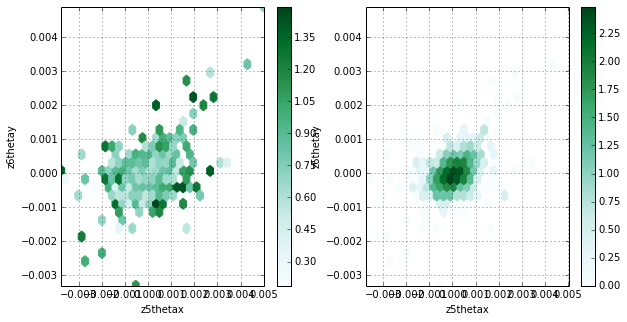

In [27]:
from IPython.html.widgets import interact

def plotter(z_x, z_x_type, z_y, z_y_type, prefix, kind):
    gridsize = 30
    if z_x == 4:
        xkey = '{2}z{1}'.format(z_x, z_x_type, prefix)
    else:
        xkey = '{2}z{0}{1}'.format(z_x, z_x_type, prefix)
        
    if z_y == 4:
        ykey = '{2}z{1}'.format(z_y, z_y_type, prefix)
    else:
        ykey = '{2}z{0}{1}'.format(z_y, z_y_type, prefix)
    if kind == 'hexbin':
        fig, axs = plt.subplots(ncols=2, figsize=(10,5))
        import mpld3; mpld3.disable_notebook()
        col_masked.plot(kind='hexbin', x=xkey, y=ykey,
                        C='fwhm_difference', reduce_C_function=np.median,
                        ax=axs[0],
                        colormap='Reds',
                        gridsize=gridsize)
        col_masked.plot(kind='hexbin', x=xkey, y=ykey,
                        C=xkey, reduce_C_function=lambda x: np.log10(len(x)),
                        ax=axs[1],
                        colormap='Reds',
                        gridsize=gridsize)
    elif kind == 'scatter':
        import mpld3; mpld3.enable_notebook()
        fig, axs = plt.subplots(ncols=1, figsize=(5,5))
        col_masked.plot(kind='scatter', x=xkey, y=ykey,
                        c='fwhm_difference',
                        alpha=0.5,
                        colormap='Reds',
                        ax=axs)
        

        
#         mpld3.plugins.connect(fig, mpld3.plugins.LinkedBrush(points))
        
coltypes = ['delta', 'thetax', 'thetay']
prefix = ['', 'do', 'dor', 'dora']
interact(plotter,
         z_x=(4,11),
         z_x_type=coltypes,
         z_y=(4,11),
         z_y_type=coltypes,
         prefix=prefix,
         kind=['scatter', 'hexbin'])